# Final Visuals

## 1. Import Libraries and Data
## 2. Create Pie Chart for price_range_loc
## 3. Most popular Departments and Products
## 4. Top 10 Products
## 5. Loyalty of members
## 6. Create a subset for loyalty_flag bar charts
## 7. Customers by Region
## 8. Stacked Charts for Region
## 9. Family data with scatterplot and line
## 10. Top 10 Products by Loyalty, Geography, num_of_dependants
## 11. Crosstabs for Excel Data
## 12. Chart for Num of Dependants and Money Spent

### 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/bethanybreed/Documents/A Career Foundry/07-2022 Instacart Basket Analysis'

In [3]:
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'prepared data', 'instacart_final.pkl'))

### 2. Create Pie Chart for price_range_loc

In [6]:
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,num_of_dependants,fam_status,income,geographic_region,five_or_more,price_range_loc
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Yes,Mid-range product
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Yes,Mid-range product
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Yes,Mid-range product
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Yes,Mid-range product
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Yes,Mid-range product


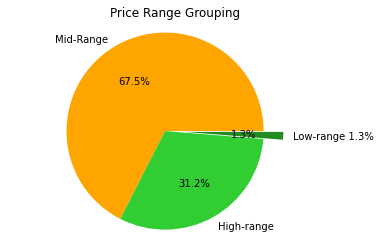

In [23]:
# Data to plot
my_data = [67.49, 31.24, 1.27]
my_labels = 'Mid-Range','High-range','Low-range 1.3%'
explode = (0,0,.2)
colors = ['orange','limegreen','forestgreen']
plt.pie(my_data,explode=explode,labels=my_labels,colors=colors,autopct='%1.1f%%')
plt.title('Price Range Grouping')
plt.axis('equal')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie1.png'))
plt.show()

In [14]:
#export pie chart

<Figure size 432x288 with 0 Axes>

### 3. Most popular Departments and Products

In [36]:
top_dep = instacart.groupby('department_id').agg({'order_number': ['max']})

In [38]:
g = top_dep['order_number'].groupby('department_id', group_keys=False)

In [43]:
instacart.groupby(['department_id'])['order_number'].sum().sort_values(ascending=False).head(10)

department_id
4     167927778
16     94870281
19     49325997
7      46040831
1      34288740
13     30891281
3      20014199
20     17210535
15     17138317
9      13674604
Name: order_number, dtype: int64

Text(0.5, 1.0, 'Number of Orders for Top 10 Departments')

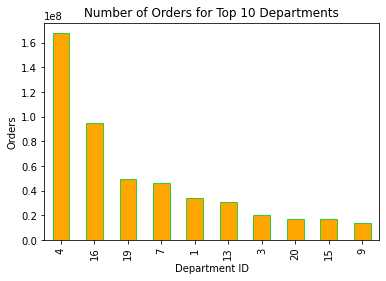

In [52]:
data = instacart.groupby(['department_id'])['order_number'].sum().sort_values(ascending=False).head(10)
bar = data.plot.bar(color = "orange",edgecolor = "limegreen")
plt.xlabel('Department ID')
plt.ylabel('Orders')
plt.title('Number of Orders for Top 10 Departments')

In [53]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top10_dept.png'))

### 4. Top 10 Products

Text(0.5, 1.0, 'Number of Orders for Top 10 Products')

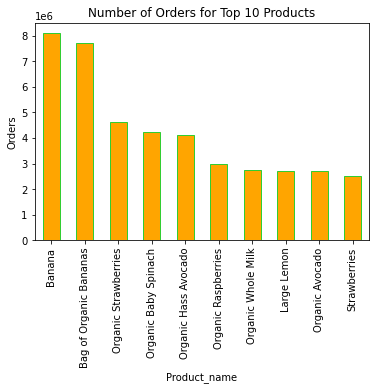

In [54]:
data = instacart.groupby(['product_name'])['order_number'].sum().sort_values(ascending=False).head(10)
bar = data.plot.bar(color = "orange",edgecolor = "limegreen")
plt.xlabel('Product_name')
plt.ylabel('Orders')
plt.title('Number of Orders for Top 10 Products')

In [55]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top10_prod.png'))

### 5. Loyalty of members

In [56]:
instacart['loyalty_flag'].value_counts(dropna=False)

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

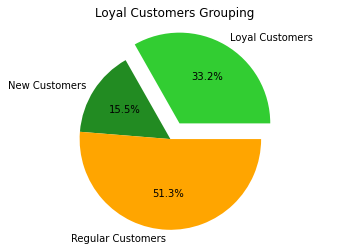

In [59]:
#Loyaltypi
my_data = [33.21, 15.51, 51.28]
my_labels = 'Loyal Customers','New Customers','Regular Customers'
explode = (.2,0,0)
colors = ['limegreen','forestgreen','orange']
plt.pie(my_data,explode=explode,labels=my_labels,colors=colors,autopct='%1.1f%%')
plt.title('Loyal Customers Grouping')
plt.axis('equal')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie2.png'))
plt.show()

In [60]:
loyalty = instacart.groupby('loyalty_flag').agg({'order_number': ['mean', 'min', 'max']})

In [61]:
loyalty

order_number        
                         mean min max
loyalty_flag                         
Loyal customer      32.641196   1  99
New customer         4.268295   1  10
Regular customer    12.347452   1  40

In [62]:
loyalty_price = instacart.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

### 6. Create a subset for loyalty_flag bar charts

In [64]:
pivot = pd.pivot_table(data=instacart, index=['loyalty_flag'], columns=['spending_flag'], values='user_id')

In [65]:
pivot.head()

spending_flag,High Spender,Low Spender
loyalty_flag,,
Loyal customer,104994.689483,102742.556154
New customer,107109.891538,103177.299349
Regular customer,104927.245923,102882.850910


[Text(0, 0, 'Loyal Customer'),
 Text(1, 0, 'New Customer'),
 Text(2, 0, 'Regular Custgomer')]

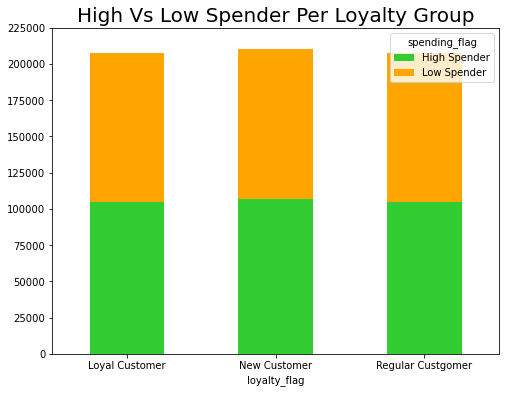

In [84]:
ax2 = pivot.plot.bar(stacked=True, color =['limegreen', 'orange'], figsize=(8,6))
ax2.set_title('High Vs Low Spender Per Loyalty Group', fontsize=20)
ax2.set_ylim(0,225000)
ax2.set_xticklabels(['Loyal Customer','New Customer','Regular Custgomer'], rotation=0)

In [85]:
ax2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_loyalty.png'))

In [77]:
pivot2 = pd.pivot_table(data=instacart, index=['loyalty_flag'], columns=['order_frequency_flag'], values='user_id')

In [78]:
pivot2.head()

order_frequency_flag,Frequent Customer,Non Frequent Customer,Regular Customer
loyalty_flag,,,
Loyal customer,102797.273448,NaN,73049.198967
New customer,103392.492545,103077.778737,103254.775114
Regular customer,103288.983490,104274.729174,101979.636145


[Text(0, 0, 'Loyal Customer'),
 Text(1, 0, 'New Customer'),
 Text(2, 0, 'Regular Custgomer')]

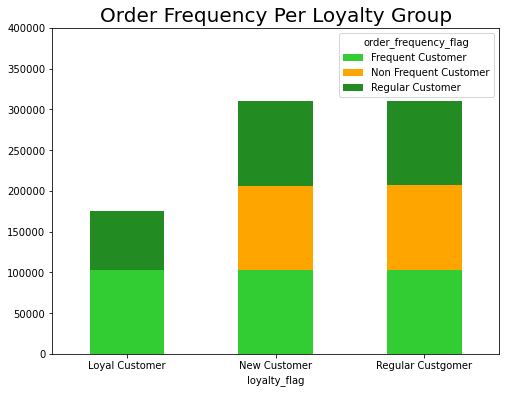

In [82]:
ax = pivot2.plot.bar(stacked=True, color =['limegreen', 'orange','forestgreen'], figsize=(8,6))
ax.set_title('Order Frequency Per Loyalty Group', fontsize=20)
ax.set_ylim(0,400000)
ax.set_xticklabels(['Loyal Customer','New Customer','Regular Custgomer'], rotation=0)

In [83]:
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_freq_loyalty.png'))

### 7. Customers by Region

In [87]:
instacart['geographic_region'].value_counts(dropna=False)

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: geographic_region, dtype: int64

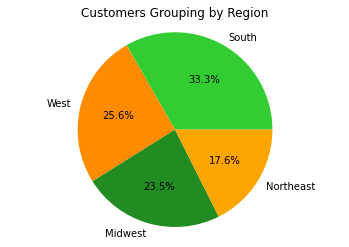

In [88]:
#Region pie
my_data = [33.3,25.6,23.5,17.6]
my_labels = 'South','West','Midwest','Northeast'
explode = (0,0,0,0)
colors = ['limegreen','darkorange','forestgreen','orange']
plt.pie(my_data,explode=explode,labels=my_labels,colors=colors,autopct='%1.1f%%')
plt.title('Customers Grouping by Region')
plt.axis('equal')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie3.png'))
plt.show()

In [89]:
regions = instacart.groupby('geographic_region').agg({'order_number': ['mean', 'min', 'max']})

In [90]:
regions

order_number        
                          mean min max
geographic_region                     
Midwest              17.602828   1  99
Northeast            17.921760   1  99
South                17.844674   1  99
West                 17.971929   1  99

### 8. Stacked Charts for Region

In [91]:
gpivot = pd.pivot_table(data=instacart, index=['geographic_region'], columns=['spending_flag'], values='user_id')

In [92]:
gpivot.head()

spending_flag,High Spender,Low Spender
geographic_region,,
Midwest,106325.771950,102951.672765
Northeast,108708.694948,102646.894330
South,102979.425968,102645.229122
West,104850.929482,103288.725369


[Text(0, 0, 'Midwest'),
 Text(1, 0, 'Northeast'),
 Text(2, 0, 'South'),
 Text(3, 0, 'West')]

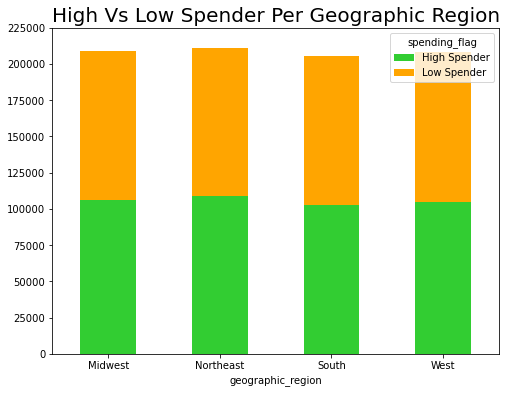

In [94]:
ax3 = gpivot.plot.bar(stacked=True, color =['limegreen', 'orange'], figsize=(8,6))
ax3.set_title('High Vs Low Spender Per Geographic Region', fontsize=20)
ax3.set_ylim(0,225000)
ax3.set_xticklabels(['Midwest','Northeast','South','West'], rotation=0)

In [95]:
ax3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_georegion.png'))

In [96]:
gpivot2 = pd.pivot_table(data=instacart, index=['geographic_region'], columns=['order_frequency_flag'], values='user_id')

In [97]:
gpivot2.head()

order_frequency_flag,Frequent Customer,Non Frequent Customer,Regular Customer
geographic_region,,,
Midwest,103003.282357,103715.663513,102846.668707
Northeast,102581.890539,105522.954771,102466.497240
South,102980.607007,102919.078972,101439.497658
West,103577.304746,102437.205336,102722.233882


[Text(0, 0, 'South'),
 Text(1, 0, 'West'),
 Text(2, 0, 'Midwest'),
 Text(3, 0, 'Northeast')]

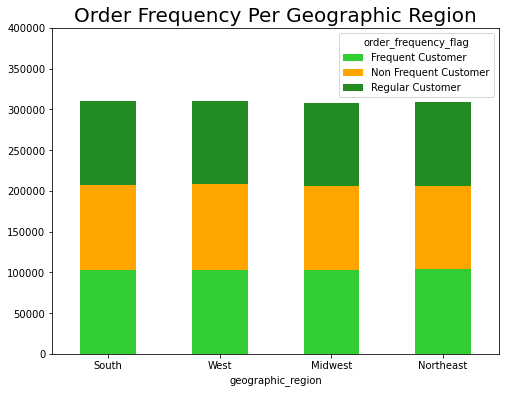

In [100]:
ax4 = gpivot2.plot.bar(stacked=True, color =['limegreen', 'orange','forestgreen'], figsize=(8,6))
ax4.set_title('Order Frequency Per Geographic Region', fontsize=20)
ax4.set_ylim(0,400000)
ax4.set_xticklabels(['South','West','Midwest','Northeast'], rotation=0)

In [101]:
ax4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_georegion.png'))

### 9. Family data with scatterplot and line

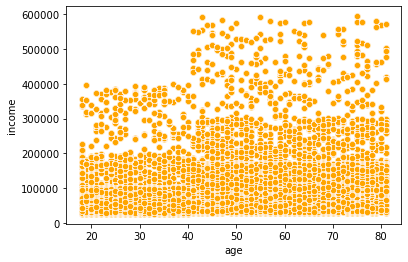

In [103]:
scatter = sns.scatterplot(x = 'age', y = 'income',data = instacart,color='orange')

In [104]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

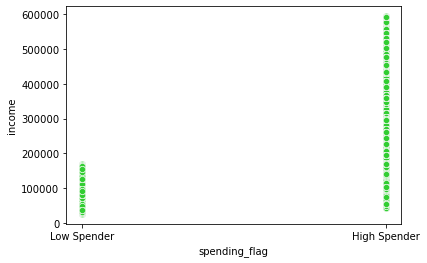

In [107]:
scatter2 = sns.scatterplot(x = 'spending_flag', y = 'income',data = instacart,color='limegreen')

In [108]:
scatter2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_spending_income.png'))

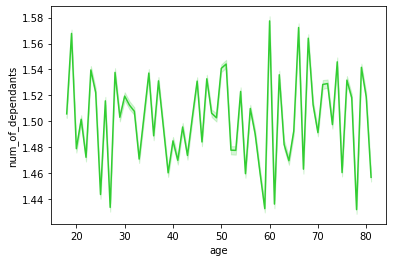

In [109]:
line = sns.lineplot(data = instacart, x = 'age',y = 'num_of_dependants',color='limegreen')

In [110]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_num_of_dependants.png'))

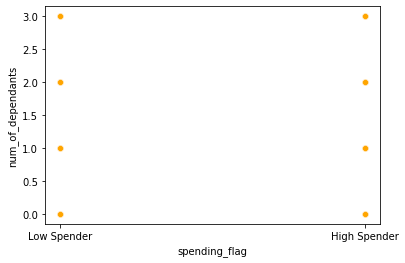

In [112]:
scatter3 = sns.scatterplot(x = 'spending_flag', y = 'num_of_dependants',data = instacart,color='orange')

In [113]:
scatter3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_depend_spending.png'))

### 10. Top 10 Products by Loyalty, Geography, num_of_dependants

In [117]:
instacart['sum_order'] = instacart.groupby(['product_id'])['order_number'].transform(np.sum)

In [119]:
instacart[['product_id', 'order_number', 'sum_order']].head(30)

,product_id,order_number,sum_order
0,196,1,611550
1,196,2,611550
2,196,3,611550
3,196,4,611550
4,196,5,611550
5,196,6,611550
6,196,7,611550
7,196,8,611550
8,196,9,611550
9,196,10,611550


### 11. Crosstabs for Excel Data

In [125]:
crosstab = pd.crosstab(instacart['loyalty_flag'], instacart['geographic_region'], dropna = False)

In [126]:
crosstab.to_clipboard()

In [130]:
crosstab2 = pd.crosstab(instacart['product_name'], instacart['loyalty_flag'], dropna = False)

In [132]:
crosstab2.to_clipboard()

### 12. Chart for Num of Dependants and Money Spent

Text(0.5, 1.0, 'Sum of Orders per Dependants')

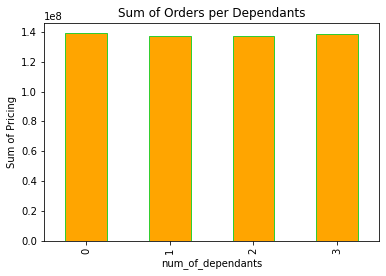

In [134]:
data = instacart.groupby(['num_of_dependants'])['order_number'].sum()
bar4 = data.plot.bar(color = "orange",edgecolor = "limegreen")
plt.xlabel('num_of_dependants')
plt.ylabel('Sum of Pricing')
plt.title('Sum of Orders per Dependants')

In [135]:
np.random.seed(4)
dev = np.random.rand(len(instacart)) <= 0.7

In [136]:
big = instacart[dev]

In [137]:
small = instacart[~dev]

In [138]:
len(instacart)

30964564

In [139]:
len(big) + len(small)

30964564

In [140]:
#Create a smaller dataset with what is needed so to use less memory

In [141]:
df_1 = small[['num_of_dependants','prices']]

Text(0.5, 1.0, 'Average Price per Size of Family')

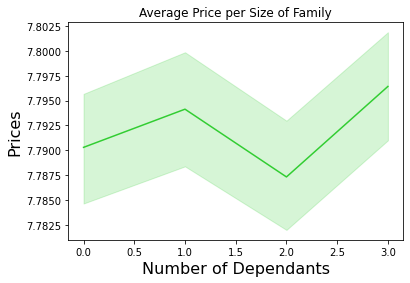

In [142]:
line1 = sns.lineplot(data = df_1, x = 'num_of_dependants',y = 'prices',color ='limegreen')
line1.set_xlabel('Number of Dependants', fontsize = 16)
line1.set_ylabel('Prices', fontsize = 16)
line1.set_title('Average Price per Size of Family')

In [143]:
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dependants.png'))

In [144]:
df_2 = instacart[['num_of_dependants','prices']]

Text(0.5, 1.0, 'Average Price per Size of Family')

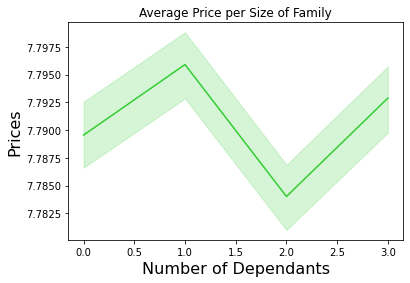

In [145]:
line2 = sns.lineplot(data = df_2, x = 'num_of_dependants',y = 'prices',color ='limegreen')
line2.set_xlabel('Number of Dependants', fontsize = 16)
line2.set_ylabel('Prices', fontsize = 16)
line2.set_title('Average Price per Size of Family')

In [146]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'total_line_prices_dependants.png'))

In [148]:
df_3= instacart[['num_of_dependants','sum_order']]

Text(0.5, 1.0, 'Number of Orders per Size of Family')

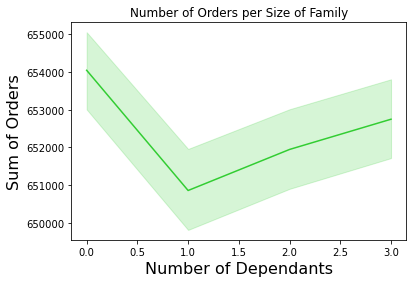

In [149]:
line1 = sns.lineplot(data = df_3, x = 'num_of_dependants',y = 'sum_order',color ='limegreen')
line1.set_xlabel('Number of Dependants', fontsize = 16)
line1.set_ylabel('Sum of Orders', fontsize = 16)
line1.set_title('Number of Orders per Size of Family')

In [150]:
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'num_ord_dependants.png'))